                                    Домашнее задание №3

Задание №1

a) диагональная, ортогональная, не единичная.
\begin{equation*}
A =
\begin{pmatrix}
  -1&0&0\\
   0&1&0\\
   0&0&-1
\end{pmatrix}
\end{equation*}
d) матрица, у которой определитель = 1, и все элементы не равны 0.
\begin{equation*}
A =
\begin{pmatrix}
   1&2&3\\
   2&5&6\\
   3&6&7
\end{pmatrix}
\end{equation*}
e) матрица (3x3), у которой определитель = 1
\begin{equation*}
A =
\begin{pmatrix}
   1&5&6\\
   0&5&0\\
   0&0&1\over{5}
\end{pmatrix}
\end{equation*}
b) верхнетреугольная, ортогональная и  нижнетреугольная, ортогональная: не смогла придумать. По-моему, подходят только диагональные матрицы, у которых диагональные элементы равно +1 или -1. 

In [28]:
import numpy as np
import pandas as pd

In [29]:
#Задание №2
m = np.array([[2, 2],
              [1, 3]])
values, vectors = np.linalg.eig(m)

In [30]:
print('Собственные значения равны:{0}'.format(values))
print('Собственные вектора равны:{0} и {1}'.format(vectors[0], vectors[1]))

Собственные значения равны:[1.00 4.00]
Собственные вектора равны:[-0.89 -0.71] и [0.45 -0.71]


In [31]:
m1 = np.array([[4, 1, -1],
              [1, 4, -1],
              [-1, -1, 4]])
values1, vectors1 = np.linalg.eig(m1)

In [32]:
print('Собственные значения равны:{0}'.format(values1))
print('Собственные вектора равны:{0}, {1} и {2}'.format(vectors1[0], vectors1[1], vectors1[2]))

Собственные значения равны:[3.00 6.00 3.00]
Собственные вектора равны:[-0.82 0.58 -0.28], [0.41 0.58 0.80] и [-0.41 -0.58 0.53]


In [33]:
#Задание №3 
A = np.array([[1, 2],
              [2, 3]])
lam, U = np.linalg.eig(A)

In [34]:
print(U.dot(np.diag(lam)).dot(np.linalg.inv(U)))

[[1.00 2.00]
 [2.00 3.00]]


In [35]:
#Задание №4
import numpy as np
import pylab as pl
import warnings

from matplotlib import pyplot as plt
from scipy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

In [36]:
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

In [148]:
X, y = load_digits(return_X_y=True)

In [149]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


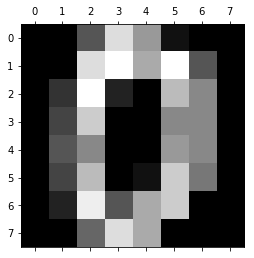

In [161]:
image = X[0]
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')
plt.show()

In [164]:
svd = TruncatedSVD(n_components=5)
X_reduced = svd.fit_transform(X)
svd.explained_variance_ratio_.sum()

0.5152668948115983

In [165]:
rf_reduced = RandomForestClassifier(oob_score=True)
rf_reduced.fit(X_reduced, y)
rf_reduced.oob_score_

0.8013355592654424

In [166]:
X_reduced.shape

(1797, 5)

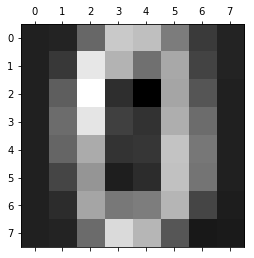

In [168]:
image_reduced = svd.inverse_transform(X_reduced[0].reshape(1,-1))
image_reduced = image_reduced.reshape((8,8))
plt.matshow(image_reduced, cmap = 'gray')